In [1]:
#load the Python packages required, giving them a shorter alias where necessary
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import yt
from yt import derived_field
from yt_astro_analysis.halo_analysis import HaloCatalog
# from yt.analysis import HaloCatalog

In [2]:
#location of the data files - note you may need to amend this
dataset = 'Enzo_64'
id = '0035'
detection_algorithm = 'hop'
location = '{0}/DD{1}/data{1}'.format(dataset, id)

In [3]:
pwd

'/home/tianyu/Desktop/DMH'

In [4]:
#Find Halos on the timestep - should be 30
data_ds = yt.load(location)
output_dir = '/home/tianyu/Desktop/DMH/outputs_Enzo64/{0}/{1}'.format(dataset, detection_algorithm)
hc1 = HaloCatalog(data_ds=data_ds, finder_method=detection_algorithm, output_dir=output_dir)
hc1.create()

/tmp/ipykernel_7560/669995261.py:2: UserWarning: This dataset appears to be of type EnzoDataset, but the following requirements are currently missing: libconf
Please verify your installation.
  data_ds = yt.load(location)
yt : [INFO     ] 2025-07-05 13:23:59,414 Parameters: current_time              = 525.81661077372
yt : [INFO     ] 2025-07-05 13:23:59,415 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2025-07-05 13:23:59,415 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-05 13:23:59,416 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-07-05 13:23:59,416 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-05 13:23:59,416 Parameters: current_redshift          = 0.2082174425385
yt : [INFO     ] 2025-07-05 13:23:59,417 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-05 13:23:59,417 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-05 13:23:59,417 Parameters: om

Copying arrays for 271566 particles
Building Tree...
Finding Densities...
Finding Densest Neighbors...
Grouping...
Merging Groups...
Writing Output...
All Done!

yt : [INFO     ] 2025-07-05 13:24:08,829 Saving 157 halos: /home/tianyu/Desktop/DMH/outputs_Enzo64/Enzo_64/hop/data0035/data0035.0.h5.


In [5]:
#Make a halo catalogue of the data and the halos
output_file = '/home/tianyu/Desktop/DMH/outputs_Enzo64/{}/{}/data{}/data{}.0.h5'.format(dataset, detection_algorithm, id, id)

halos_ds = yt.load(output_file)


yt : [INFO     ] 2025-07-05 13:24:08,959 Parameters: current_time              = 525.81661077372 code_time
yt : [INFO     ] 2025-07-05 13:24:08,960 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-07-05 13:24:08,960 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2025-07-05 13:24:08,960 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2025-07-05 13:24:08,961 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-05 13:24:08,961 Parameters: current_redshift          = 0.2082174425385
yt : [INFO     ] 2025-07-05 13:24:08,962 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-05 13:24:08,962 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-05 13:24:08,962 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-05 13:24:08,963 Parameters: hubble_constant           = 0.71


In [6]:
hc = HaloCatalog(data_ds=data_ds,halos_ds=halos_ds, output_dir=output_dir)

yt : [INFO     ] 2025-07-05 13:24:09,037 Allocating for 157 particles


yt : [INFO     ] 2025-07-05 13:24:09,335 Projection completed
yt : [INFO     ] 2025-07-05 13:24:09,337 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-05 13:24:09,337 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-05 13:24:09,339 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-07-05 13:24:09,339 ylim = 0.000000 1.000000
yt : [INFO     ] 2025-07-05 13:24:09,341 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



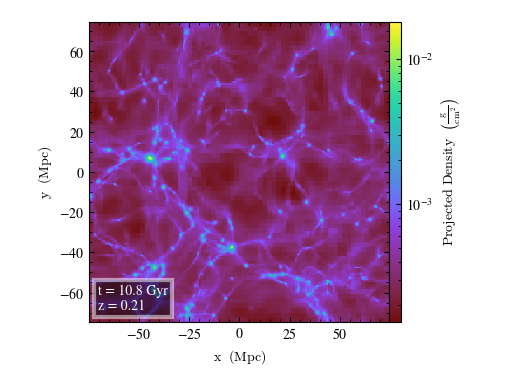

yt : [INFO     ] 2025-07-05 13:24:09,882 Saving plot /home/tianyu/Desktop/DMH/outputs_Enzo64/Enzo_64/hop/halos_on_projection_plot_z_density.pdf0035_Projection_z_density.png


['/home/tianyu/Desktop/DMH/outputs_Enzo64/Enzo_64/hop/halos_on_projection_plot_z_density.pdf0035_Projection_z_density.png']

In [7]:
# Create a projection plot with the halos overplotted on top
proj = 'z'
quantity = 'density'
output_fmt = 'pdf'
window_size = 3
fontsize = 10

p1 = yt.ProjectionPlot(data_ds, proj, quantity, window_size=(window_size, window_size), fontsize=fontsize)
#p1.annotate_halos(hc)
p1.annotate_timestamp(time= True, redshift=True, draw_inset_box=True)
p1.show()
#to save the figure uncomment this
p1.save(output_dir + '/halos_on_projection_plot_{0}_{1}.{2}' .format(proj, quantity, output_fmt)+id)

In [8]:
#See the effect of adding a filter to the particle mass (which is actually the halo mass)
#Now only 17 halos, stored in a new file
hc.add_filter('quantity_value', 'particle_mass', '>', 1E15, 'Msun');
hc.create()

yt : [INFO     ] 2025-07-05 13:24:10,023 Saving 1 halos: /home/tianyu/Desktop/DMH/outputs_Enzo64/Enzo_64/hop/data0035/data0035.0.h5.


yt : [INFO     ] 2025-07-05 13:24:10,239 Parameters: current_time              = 525.81661077372 code_time
yt : [INFO     ] 2025-07-05 13:24:10,239 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-07-05 13:24:10,240 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2025-07-05 13:24:10,240 Parameters: domain_right_edge         = [1. 1. 1.] code_length
yt : [INFO     ] 2025-07-05 13:24:10,241 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-07-05 13:24:10,241 Parameters: current_redshift          = 0.2082174425385
yt : [INFO     ] 2025-07-05 13:24:10,241 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-07-05 13:24:10,241 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-07-05 13:24:10,242 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-07-05 13:24:10,243 Parameters: hubble_constant           = 0.71
yt : [INFO     ] 2025-07-05 13:24:10,301 Allocating for 1 particles
yt : [I


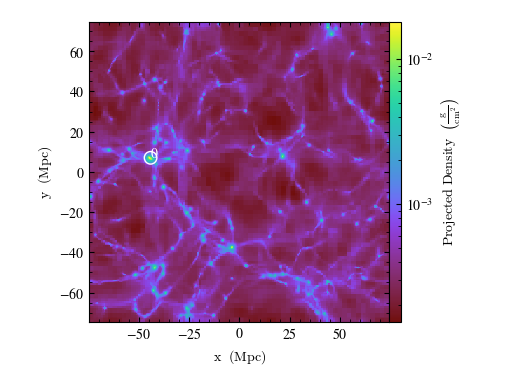

yt : [INFO     ] 2025-07-05 13:24:11,020 Saving plot /home/tianyu/Desktop/DMH/outputs_Enzo64/Enzo_64/hop/halos_on_projection_plot_filtered_z_density.pdf0035Finder_Projection_z_density.png


['/home/tianyu/Desktop/DMH/outputs_Enzo64/Enzo_64/hop/halos_on_projection_plot_filtered_z_density.pdf0035Finder_Projection_z_density.png']

In [9]:
#Need to reload the new catalogue now
halos_ds = yt.load(output_file)
hc = HaloCatalog(data_ds=data_ds, halos_ds=halos_ds);
p2 = yt.ProjectionPlot(data_ds, proj, quantity, window_size=(window_size, window_size), fontsize=fontsize)
p2.annotate_halos(hc, annotate_field = 'particle_identifier')
p2.show()
#to save the figure uncomment this
p2.save(output_dir + '/halos_on_projection_plot_filtered_{0}_{1}.{2}'.format(proj, quantity, output_fmt)+id+'Finder')

In [10]:
# attach a sphere object to each halo whose radius extends to twice the radius of the halo
profile_dir = output_dir + '/profiles'
hc.add_callback("sphere", factor=2.0)

In [11]:
# use the sphere to calculate radial profiles of gas density 
# weighted by cell volume in terms of the virial radius
hc.add_callback("profile", ["radius"],
                [("gas", "overdensity")],
                weight_field="cell_volume", 
                accumulation=True,
                storage="virial_quantities_profiles")
hc.add_callback("profile", ["radius"],
                [("gas", "temperature")],
                weight_field="cell_volume", 
                accumulation=True,
                storage="virial_quantities_profiles")

In [12]:
# Define a virial radius for the halo.
hc.add_callback("virial_quantities", ["radius"], 
                profile_storage = "virial_quantities_profiles")

In [13]:
#Now that we have calculated the virial radius, we delete the profiles we used to find it
hc.add_callback('delete_attribute','virial_quantities_profiles')

In [14]:
#Now that we have calculated virial quantities we can add a new sphere 
#that is aware of the virial radius calculated
hc.add_callback('sphere', radius_field='radius_200', factor=5,
                field_parameters=dict(virial_radius=('quantity', 'radius_200')))

In [15]:
#calculate a gas density profile along the virial radius, weighted by the cell mass
hc.add_callback('profile', 'virial_radius_fraction', [('gas','overdensity')],
storage='virial_profiles',
weight_field='cell_mass',
accumulation=False)
hc.add_callback('profile', 'virial_radius_fraction', [('gas','temperature')],
storage='virial_profiles',
weight_field='cell_mass',
accumulation=False)
hc.add_callback('profile', 'virial_radius_fraction',[('enzo','Dark_Matter_Density')],
storage='virial_profiles',
weight_field='cell_mass',
accumulation=False)
hc.add_callback('profile', 'virial_radius_fraction', [('enzo','Temperature')],
storage='virial_profiles',
weight_field='cell_mass',
accumulation=False)
hc.add_callback('profile', 'virial_radius_fraction', [('enzo','TotalEnergy')],
storage='virial_profiles',
weight_field='cell_mass',
accumulation=False)
hc.add_callback('profile', 'virial_radius_fraction', [('enzo','Density')],
storage='virial_profiles',
weight_field='cell_mass',
accumulation=False)


In [16]:
# Save the profiles
hc.add_callback("save_profiles", storage="virial_profiles", output_dir=profile_dir)
#hc.add_callback("save_profiles", storage="virial_profiles")

In [17]:
#execute the callbacks and profiles set up above
hc.create()

yt : [INFO     ] 2025-07-05 13:24:11,200 Calculating 1D profile for halo 0.
yt : [INFO     ] 2025-07-05 13:24:11,227 Calculating virial quantities for halo 0.
yt : [INFO     ] 2025-07-05 13:24:11,229 Calculating 1D profile for halo 0.
yt : [INFO     ] 2025-07-05 13:24:11,350 Saving halo 0 profile data to /home/tianyu/Desktop/DMH/outputs_Enzo64/Enzo_64/hop/profiles/virial_profiles_000000.h5.
yt : [INFO     ] 2025-07-05 13:24:11,356 Saving 1 halos: halo_catalogs/data0035/data0035.0.h5.


In [18]:
# Add load callbacks for the profiles
# hc.add_callback('load_profiles', storage='virial_profiles',output_dir='profiles')
hc.add_callback('load_profiles', storage='virial_profiles', output_dir=profile_dir)
hc.load()

yt : [INFO     ] 2025-07-05 13:24:11,509 Calculating 1D profile for halo 0.
yt : [INFO     ] 2025-07-05 13:24:11,533 Calculating virial quantities for halo 0.
yt : [INFO     ] 2025-07-05 13:24:11,535 Calculating 1D profile for halo 0.
yt : [INFO     ] 2025-07-05 13:24:11,656 Saving halo 0 profile data to /home/tianyu/Desktop/DMH/outputs_Enzo64/Enzo_64/hop/profiles/virial_profiles_000000.h5.
yt : [INFO     ] 2025-07-05 13:24:11,661 Loading halo 0 profile data from /home/tianyu/Desktop/DMH/outputs_Enzo64/Enzo_64/hop/profiles/virial_profiles_000000.h5.


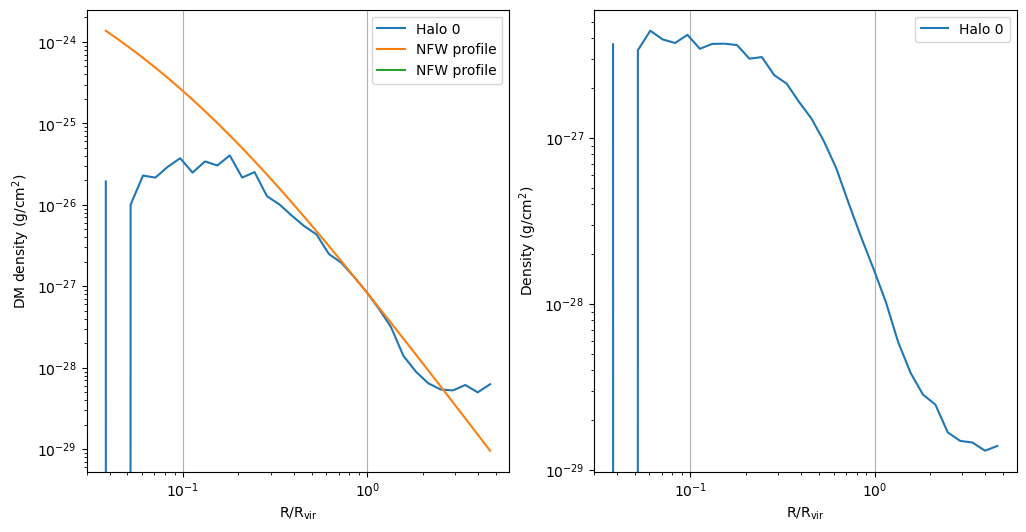

In [19]:
# #Take the 2nd halo and plot its profiles
# halo = hc.halo_list[4]

# radius = halo.virial_profiles[u"('index', 'virial_radius_fraction')"]
# overdensity = halo.virial_profiles[u"('gas', 'overdensity')"]

# #Plot the profile for the halo
# plt.plot(np.array(radius), np.array(overdensity))

# #Plot 1/(1+r^2) profile for comparison
# plt.plot(np.array(radius),100/(1+np.array(radius)**(2.0)), "g-")

# plt.semilogy()
# plt.xlabel(r'$\rm{R/R_{vir}}$')
# plt.ylabel(r'$\rm{Overdensity\/\/(K)}$')

# plt.show()
# #plt.save()

n_halos = len(hc.halo_list)
halo_ids = tuple(range(n_halos))
halos = tuple(hc.halo_list[halo_id] for halo_id in halo_ids)
def get_hdata(halos,data_key):
    return tuple(np.array(halo.virial_profiles[data_key]) for halo in halos)
def prof_func(r):
    rho_o=1e-24
    r_s=0.1
    return rho_o/((r/r_s)*(1+r/r_s)**2.0)


radii = get_hdata(halos, u"('index', 'virial_radius_fraction')")
dm_densities = get_hdata(halos, u"('enzo', 'Dark_Matter_Density')")
densities = get_hdata(halos, u"('enzo', 'Density')")
#Plot the profile for the halos
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
for halo_id,radius,dm_density,density in zip(halo_ids,radii,dm_densities,densities):
    np.save(output_dir+"/vrad_{0}_{1}_{2}.npy".format(id,detection_algorithm,halo_id),radius)
    np.save(output_dir+"/dmd_{0}_{1}_{2}.npy".format(id,detection_algorithm,halo_id),dm_density)

    np.save(output_dir+"/d_{0}_{1}_{2}.npy".format(id,detection_algorithm,halo_id),density)
    ax1.plot(radius,dm_density,label='Halo {0}'.format(halo_id))
    ax2.plot(radius,density,label='Halo {0}'.format(halo_id))
#Plot profile for comparison
ax1.plot(np.array(radius),prof_func(radius), "-", "", label="NFW profile")
for ax in (ax1,ax2):
    ax.loglog()
    ax.legend(loc='best')
    ax.grid(axis='x')
    ax.set_xlabel(r'$\rm{R/R_{vir}}$')
    ax1.set_ylabel(r'DM density $\rm{(g/cm^2)}$')
    ax2.set_ylabel(r'Density $\rm{(g/cm^2)}$')
fig.savefig(output_dir+"/dmd+d.{0}".format(output_fmt))

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid

radius = hc.halo_list[0].virial_profiles[u"('index', 'virial_radius_fraction')"]
G = 1      
rho0 = 100
R0 = 1
Rs = 2
r = radius
dr = r[1] - r[0]

# NFW
rho_c = rho0 / ((r / Rs) * (1 + r / Rs)**2)
integrand_c = 4 * np.pi * r**2 * rho_c
M_c = cumulative_trapezoid(integrand_c, r, initial=0)
v_c = np.sqrt(G * M_c / r)

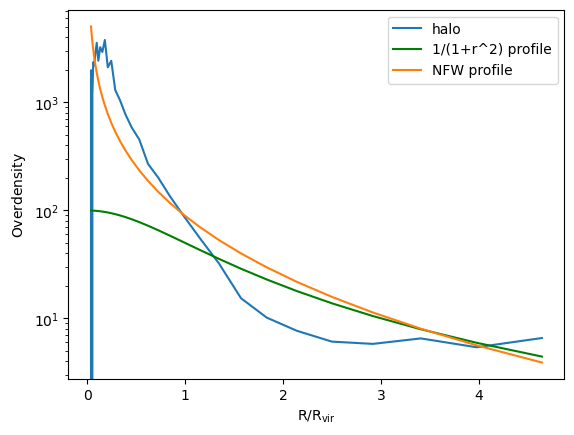

In [21]:
halo=hc.halo_list[0]
radius = halo.virial_profiles[u"('index', 'virial_radius_fraction')"]
overdensity = halo.virial_profiles[u"('gas', 'overdensity')"]
Temp = halo.virial_profiles[u"('gas', 'temperature')"]



# #Plot the profile for the halo
plt.plot(np.array(radius), np.array(overdensity),label = 'halo')

# #Plot 1/(1+r^2) profile for comparison
plt.plot(np.array(radius),100/(1+np.array(radius)**(2.0)), "g-",label = '1/(1+r^2) profile')

# #Plot 1/(1+r^2) profile for comparison
plt.plot(np.array(radius),np.array(rho_c),label = 'NFW profile')

plt.semilogy()
plt.xlabel(r'$\rm{R/R_{vir}}$')
plt.ylabel(r'$\rm{Overdensity}$')
plt.legend()
plt.show()

##plt.save()

In [22]:
radius

unyt_array([0.03813103, 0.04451918, 0.05197754, 0.0606854 , 0.07085211,
       0.08272206, 0.0965806 , 0.11276089, 0.13165187, 0.15370769,
       0.17945855, 0.20952349, 0.24462524, 0.28560764, 0.33345588,
       0.38932021, 0.45454355, 0.53069386, 0.61960173, 0.72340445,
       0.84459739, 0.98609395, 1.15129562, 1.34417375, 1.56936502,
       1.83228289, 2.13924776, 2.49763886, 2.91607173, 3.40460522,
       3.97498339, 4.64091781], '(dimensionless)')

In [23]:
overdensity

unyt_array([1979.61699092,    0.        , 1152.06263112, 2347.47352716,
       2195.20844507, 2843.38190889, 3570.95514069, 2436.59849022,
       3250.25952865, 2935.46497944, 3789.91407537, 2117.51928223,
       2432.61583733, 1303.07040237, 1053.47531557,  776.03032707,
        584.48796944,  454.55567511,  270.36563704,  201.93344777,
        135.08280579,   88.51631963,   55.12828817,   32.31316352,
         15.39163097,   10.17881553,    7.68958116,    6.10194136,
          5.81597301,    6.53665676,    5.41038914,    6.59088509], '(dimensionless)')